**PREPARED BY IBRAHIM ABU SAIID**

---


# Mall Customer Segmentation with K-Means Clustering

---

This notebook demonstrates customer segmentation using the Mall Customer dataset. The primary goal is to cluster customers based on their spending behavior and demographic attributes using the K-Means clustering algorithm. This segmentation helps identify target customer groups for personalized marketing strategies.

---


## Key Steps in the Project:
1. Load and explore the dataset to understand its structure and features.
2. Perform data preprocessing, including handling missing values and scaling.
3. Apply the K-Means clustering algorithm to segment customers into distinct groups in two scenarios.
   - On the original data.
   - On the encoded data generated by training an Autoencoder.
4. Visualize the clusters to compare the results and gain insights into customer segmentation.
5. Use SHAP to explain the K-Means clustering predictions, providing interpretability to the clustering model:
   - Visualize SHAP values to understand feature importance.
   - Summarize the SHAP values using plots for further analysis.

The notebook provides a hands-on demonstration of unsupervised machine learning techniques for market basket analysis, making it a valuable resource for data science.

---

In [ ]:
# Data access: Mounting Google Drive for access
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Reading and Preprocessing the Data**

In [ ]:
import pandas as pd

# Reading the CSV file from drive into a DataFrame
df = pd.read_csv('/content/drive/My Drive/Mall_Customers.csv')

# Displaying the first few rows of the DataFrame
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Information on features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Encode categorical features
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Display the preprocessed DataFrame
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


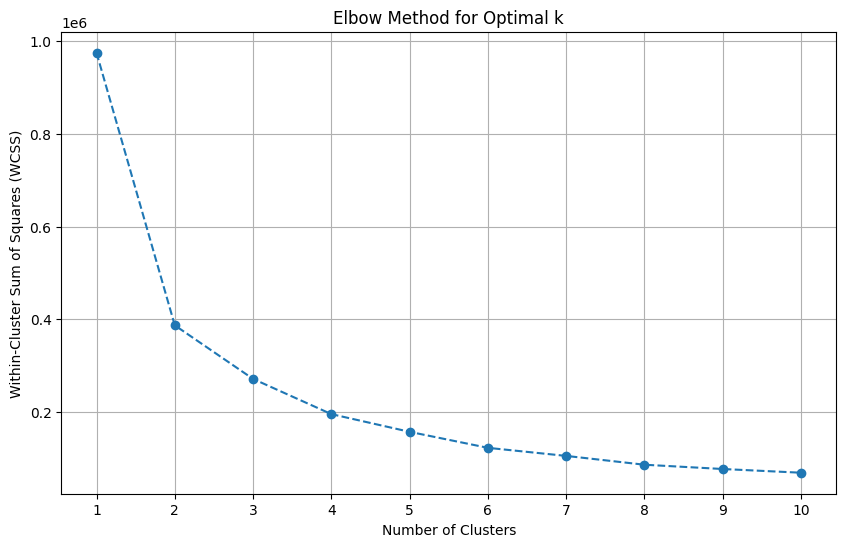

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Finding the optimal number of clusters using the elbow method
wcss = []
max_clusters = 10  # maximum number of clusters to test

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(np.arange(1, max_clusters + 1, 1))
plt.grid(True)
plt.show()

# **Applying K-means Clustering on Original Data**

In [ ]:
# Apply K-means clustering on original data
kmeans_original = KMeans(n_clusters=5, init='k-means++', n_init = 10, random_state=42)
clusters_original = kmeans_original.fit_predict(df)
silhouette_original = silhouette_score(df, clusters_original)
print(f'Silhouette Score on Original Data: {silhouette_original}')


Silhouette Score on Original Data: 0.42309497779166094


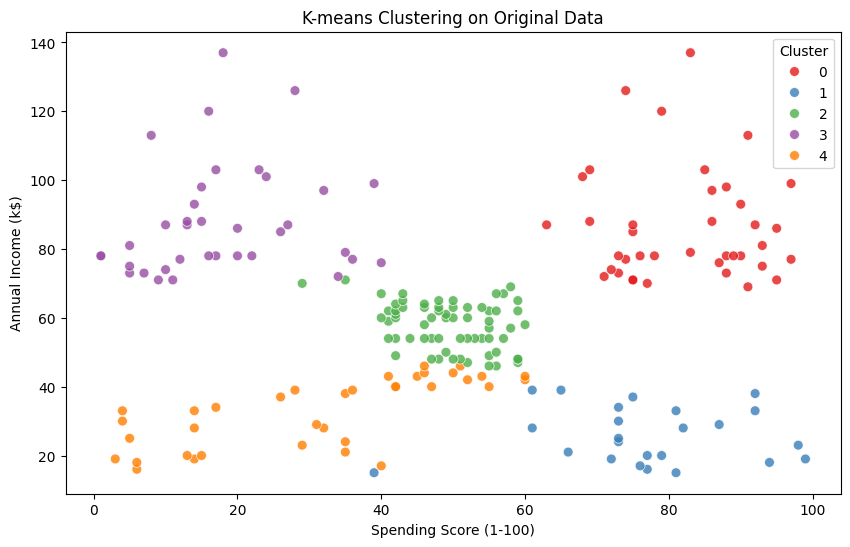

In [ ]:
# Visualize K-means clusters on original data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Spending Score (1-100)'], y=df['Annual Income (k$)'], hue=clusters_original, palette='Set1', s=50, alpha=0.8, legend='full')
plt.title('K-means Clustering on Original Data')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Cluster', loc='upper right')

plt.show()

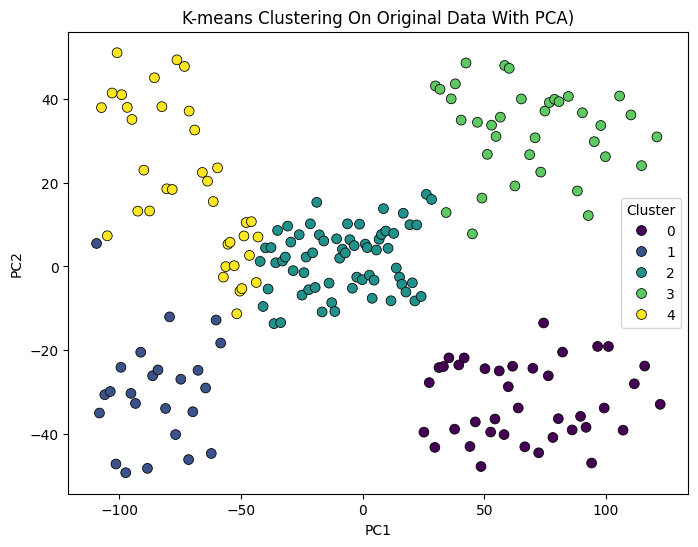

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality of the data to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

# Create a DataFrame for the PCA results and the cluster labels
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters_original

# Create a scatter plot of the data points, colored by cluster labels
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', edgecolor='k', s=50)
plt.title('K-means Clustering On Original Data With PCA)')
plt.legend(title='Cluster')
plt.show()

# **Training the Autoencoder on Original Data**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define the autoencoder architecture
input_dim = df.shape[1]
encoding_dim = 5  # Size of the bottleneck layer

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))

# Extract the encoder part for feature extraction
encoder_model = Model(inputs=input_layer, outputs=encoder)
encoded_features = encoder_model.predict(df)

Epoch 1/50
5/5 [==============================] - 1s 46ms/step - loss: 4527.3350 - val_loss: 4183.2705
Epoch 2/50
5/5 [==============================] - 0s 13ms/step - loss: 4526.6885 - val_loss: 4182.7158
Epoch 3/50
5/5 [==============================] - 0s 15ms/step - loss: 4526.3721 - val_loss: 4182.4424
Epoch 4/50
5/5 [==============================] - 0s 9ms/step - loss: 4526.2119 - val_loss: 4182.1406
Epoch 5/50
5/5 [==============================] - 0s 10ms/step - loss: 4526.1226 - val_loss: 4181.9243
Epoch 6/50
5/5 [==============================] - 0s 13ms/step - loss: 4525.9873 - val_loss: 4181.8311
Epoch 7/50
5/5 [==============================] - 0s 13ms/step - loss: 4525.8516 - val_loss: 4181.7935
Epoch 8/50
5/5 [==============================] - 0s 14ms/step - loss: 4525.7021 - val_loss: 4181.7788
Epoch 9/50
5/5 [==============================] - 0s 14ms/step - loss: 4525.5352 - val_loss: 4181.7734
Epoch 10/50
5/5 [==============================] - 0s 13ms/step - loss: 45

# **Apply K-means clustering on encoded data**

In [ ]:
# Apply K-means clustering on encoded data
kmeans_encoded = KMeans(n_clusters=5, random_state=42)
clusters_encoded = kmeans_encoded.fit_predict(encoded_features)
silhouette_encoded = silhouette_score(encoded_features, clusters_encoded)
print(f'Silhouette Score on Encoded Data: {silhouette_encoded}')

Silhouette Score on Encoded Data: 0.48510247468948364


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


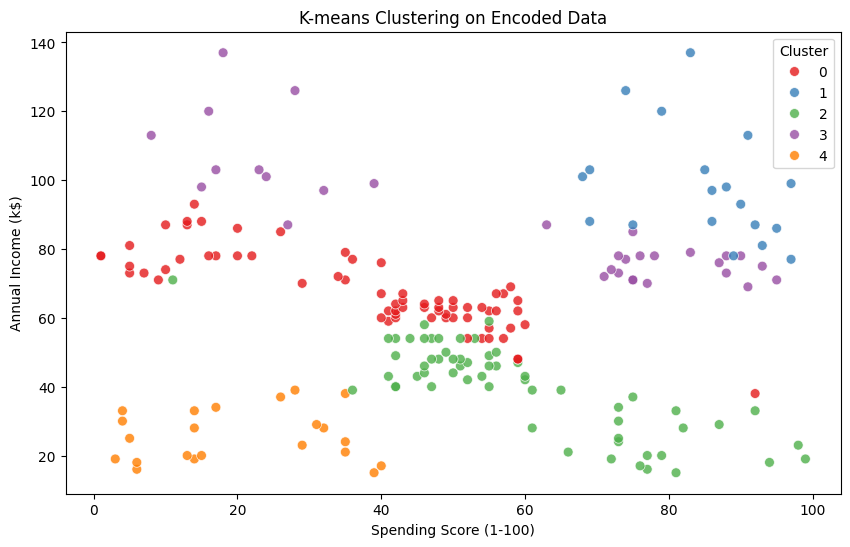

In [ ]:
# Visualize K-means clusters on encoded data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Spending Score (1-100)'], y=df['Annual Income (k$)'], hue=clusters_encoded, palette='Set1', s=50, alpha=0.8, legend='full')
plt.title('K-means Clustering on Encoded Data')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Cluster')

plt.show()

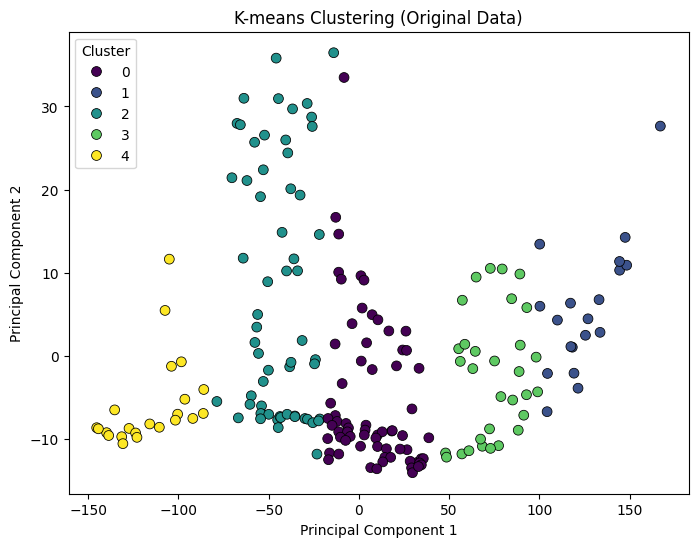

In [ ]:
# Apply PCA to reduce the dimensionality of the data to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(encoded_features)

# Create a DataFrame for the PCA results and the cluster labels
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters_encoded

# Create a scatter plot of the data points, colored by cluster labels
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', edgecolor='k', s=50)
plt.title('K-means Clustering (Original Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
!pip install shap

  0%|          | 0/200 [00:00<?, ?it/s]

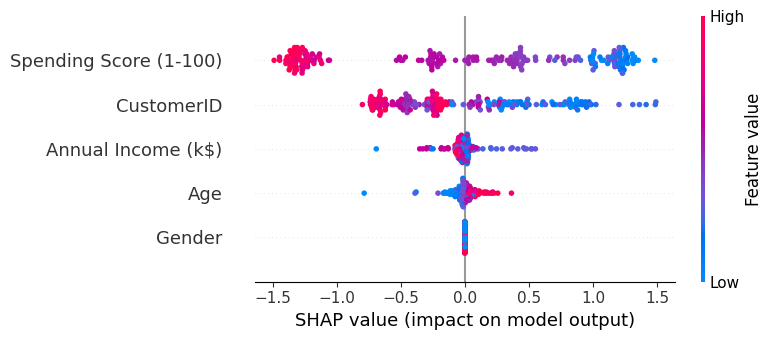

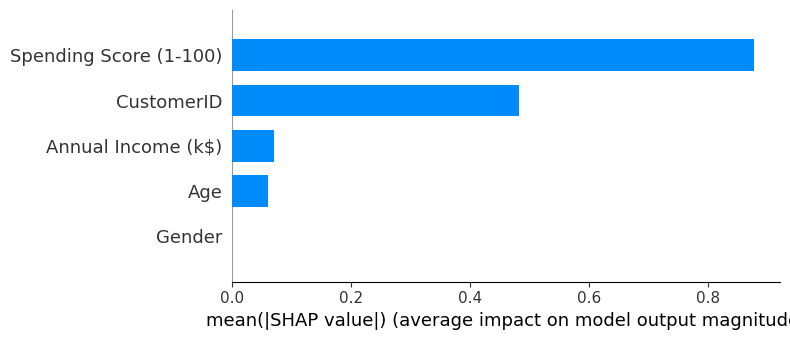

In [ ]:
import shap

# Create a SHAP explainer
explainer = shap.KernelExplainer(kmeans_original.predict, df)

# Calculate SHAP values
shap_values = explainer.shap_values(df)

# Plot the SHAP values
shap.summary_plot(shap_values, df)

# Plot the SHAP bar plot
shap.summary_plot(shap_values, df, plot_type="bar")